# PROGRAMMING FOR DATA ANALYSIS
##  Project 2018
### DATE DUE ON/BEFORE 14 DEC 2018

Problem statement

It is requested to investigate any relationship between the touchdown distance of the aircraft known as the X-15 and the following parameters, Indicated airspeed, groundspeed and Distance to touchdown at 1 mile to landing.

It is envisaged that as a result of energy in the aircraft, that the landing distance will vary.
Energy in the aircraft will be proportional to the Vertical velocity, Airspeed and Groundspeed and in turn the energy in the aircraft needs to be 'depeleted sufficiently' to allow the aircraft to land.
The measurement of this is the distance used during the slideout (usually known as rollout on wheels)

Data is supplied in the document 'STATISTICAL ANALYSIS OF LANDING CONTACT CONDITIONS OF THE X-15 AIRPLANE' at the URL https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19670005606.pdf 

## Reason for very late start.
Delayed start to project:
Mostly work related - project work and frustration with certain internal processes.
Was not in any shape to do any study after work - very frustrating.
Also not knowing what to pick as a subject that would not be work related and breach confidentiality at all and personal/work-related reasons.
The Datasets that I would be used to which would be interesting to investigate would not be allowed to be put up on GITHUB for anyone to download - even if the datsets were 'shifted/translated' along the X-axis or scaled up/down the Y-axis.
It was a long time before I found this PDF file on the NASA Technical website which provided sufficient data to create suitable datasets.


The following parameters are known to be related to the Slideout(rollout) distance.
Vertical velocity (
Indicated Airspeed at Landing
True Groundspeed at Landing


It has been found from landing data that the parameters are 
Page 4 : Vertical Velocity = Average 2 ft/sec, Poisson, Min 1, Max 8 ft/sec  ( 480 ft/min )
Page 5 : Indicated Airspeed = 190 knots Normal bell-curve, Min 150, Max 230, SD = 13 knots.
Page 6 : True Groundspeed = Centered on 200 knots Normal bell-curve, Min 160, Max 240, SD = 13 knots.
and
Page 10: Slideout (Rollout) distance  =  Centered on 6000 feet Normal, Min 3000, max 9000, SD = 1000 feet



In [18]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

# ref #1
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# import functionality for computing some statistics
import statistics 

# Setup the data arrays/lists
# VerticalSpeed is usually known as VerticalSpeed nowadays - the name VSI for the indicator
VerticalVelocity = []
IndicAirspeed    = []
Truegroundspeed  = []
SlideoutDistance = []
SlideoutDist1000 = []

Overall = []
tmpset = []
filnam_realdata = "c:\data\proj2018-dataactual.csv"
filnam_normdata = "c:\data\proj2018-datanormalised.csv"

cols_titles = "VerticalVelocity,IndicatedAirspeed,TrueGroundspeed,SlideoutDistance,SlideoutDist1000"
n = 200
x = 0
dec_digits = 1

# Populate the VerticalVelocity data list
# ref #3
averg = 2
VerticalVelocity = np.random.poisson(averg, n)
#VSgraph = plt.hist(VerticalVelocity, 14, density=True)
#plt.show()

# setup the Indicated airspeed dataset
# ref #4
center = 190
sd = 13
IndicAirspeed = np.random.normal(center, sd, n)
#IASgraph = plt.hist(IndicAirspeed, 14, density=True)
#plt.show()

center = 200
sd = 13
TrueGroundspeed = np.random.normal(center, sd, n)
#GNDSPDgraph = plt.hist(TrueGroundspeed, 14, density=True)
#plt.show()

center = 6000
sd = 1000
SlideoutDistance = np.random.normal(center, sd, n)
#SlideDistgraph = plt.hist(SlideoutDistance, 14, density=True)
#plt.show()

# round the SlideoutDistance down to the nearest 1000 to be used for categories (like the IRIS species)
SlideoutDist1000.clear()
for x in range(n):
#    SlideoutDist1000.append( 1000* (int(SlideoutDistance[x] / 1000)))
    SlideoutDist1000.append(  (int(SlideoutDistance[x] / 1000)))
        
# rond off each list to 'x' decimal places        
for x in range(n):
    VerticalVelocity[x] = int( dec_digits * VerticalVelocity[x] ) / dec_digits
    IndicAirspeed[x]    = int( dec_digits * IndicAirspeed[x]    ) / dec_digits
    TrueGroundspeed[x]  = int( dec_digits * TrueGroundspeed[x]  ) / dec_digits
    SlideoutDistance[x] = int( dec_digits * SlideoutDistance[x] ) / dec_digits

        
# save overall Dataset to file
# ref #5 + #6
# open an output file for saving the datset line by line - thereby making a 'normal' CSV file'
file = open(filnam_realdata,'w') 
file.write(cols_titles+"\n")

# now to generate a single dataset with each element of the three input giving a simulated output the slideout distance
Overall.clear()
for x in range(n):
    tmp5 = str(VerticalVelocity[x])+","+str(IndicAirspeed[x])    +","+str(TrueGroundspeed[x])+","+str(SlideoutDistance[x])+","+str(SlideoutDist1000[x])
    Overall.append( tmp5 )
    file.write(tmp5+"\n")

# close the file.
file.close()
    
# show the amalgamated dataset
#print ( Overall )



# NORMALIZE/NORMALISE (SHIFT + Scale) the datsets towards the middle/average for each set
# shift the list towards the mean
tmpset = VerticalVelocity
mmin = tmpset.min()
avg = tmpset.mean()
stddev = tmpset.std()
for x in range(n):
    tmpset[x] = int( dec_digits *(tmpset[x] - mmin)/ stddev) / dec_digits
#    tmpset[x] = int( dec_digits *(tmpset[x] - avg)/ stddev) / dec_digits
VerticalVelocity = tmpset

# shift the list towards the mean
tmpset = IndicAirspeed
mmin = tmpset.min()
avg = tmpset.mean()
stddev = tmpset.std()
for x in range(n):
    tmpset[x] = int( dec_digits *(tmpset[x] - mmin)/ stddev) / dec_digits
#    tmpset[x] = int( dec_digits *(tmpset[x] - avg)/ stddev) / dec_digits
IndicAirspeed = tmpset

# shift the list towards the mean
tmpset = TrueGroundspeed
mmin = tmpset.min()
avg = tmpset.mean()
stddev = tmpset.std()
for x in range(n):
    tmpset[x] = int( dec_digits *(tmpset[x] - mmin)/ stddev) / dec_digits
#    tmpset[x] = int( dec_digits *(tmpset[x] - avg)/ stddev) / dec_digits
TrueGroundspeed = tmpset

# shift the list towards the mean
tmpset = SlideoutDistance
mmin = tmpset.min()
avg = tmpset.mean()
stddev = tmpset.std()
for x in range(n):
    tmpset[x] = int( dec_digits *(tmpset[x] - avg)/ stddev) / dec_digits
#    tmpset[x] = int( dec_digits *(tmpset[x] - mmin)/ stddev) / dec_digits
SlideoutDistance = tmpset

# We do not scale the list  SlideoutDist1000 as this is the 'key' or the 'species' (iris dataset)






# save overall Dataset to file
# ref #5 + #6
# open an output file for saving the datset line by line - thereby making a 'normal' CSV file'
file = open(filnam_normdata,'w') 
file.write(cols_titles+"\n")

# now to generate a new single dataset with each element of the three input giving a simulated output the slideout distance
Overall.clear()
for x in range(n):
    tmp5 = str(VerticalVelocity[x])+","+str(IndicAirspeed[x])    +","+str(TrueGroundspeed[x])+","+str(SlideoutDistance[x])+","+str(SlideoutDist1000[x])
    Overall.append( tmp5 )
    file.write(tmp5+"\n")

# close the output file
file.close()
    

############################
#
#  NEXT PART OF PROJECT - TO PROCESS/DISPLAY THE GENERATED DATASET(S)
#
############################


In [19]:

import numpy as np
import csv
import math
import matplotlib.pyplot as plt

# ref #1
import pandas as pd
import seaborn as sns
import scipy.stats as stats


df = []

# now to process the data sets
# ref #7
df.clear()
df = pd.read_csv("c:\data\iris-20181213.csv")
# temp display the head of the dataset - works
df.head(4)

# lots of trouble here 
### this is the error coming up
### C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
###   max_open_warning, RuntimeWarning)
###


#tips = sns.load_dataset("tips")
#ax = sns.scatterplot(x="total_bill", y="tip", data=tips)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


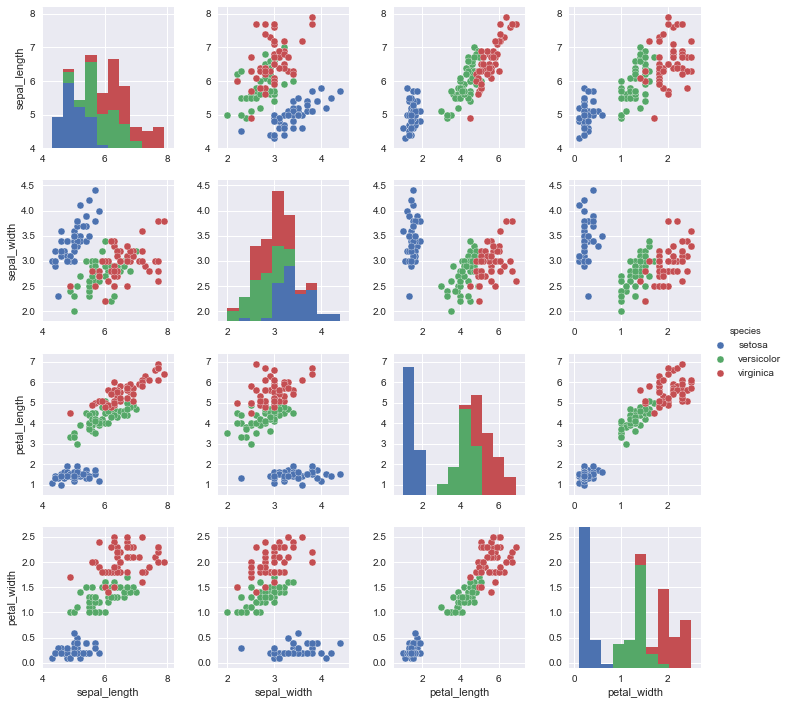

In [25]:
### this cell inserted to make sure my computer actually works with  iris.csv and  seaborn
# ref #1
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
#
# Load the iris data set from a URL.
#df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
#sns.pairplot(df, hue='species')
#plt.show()


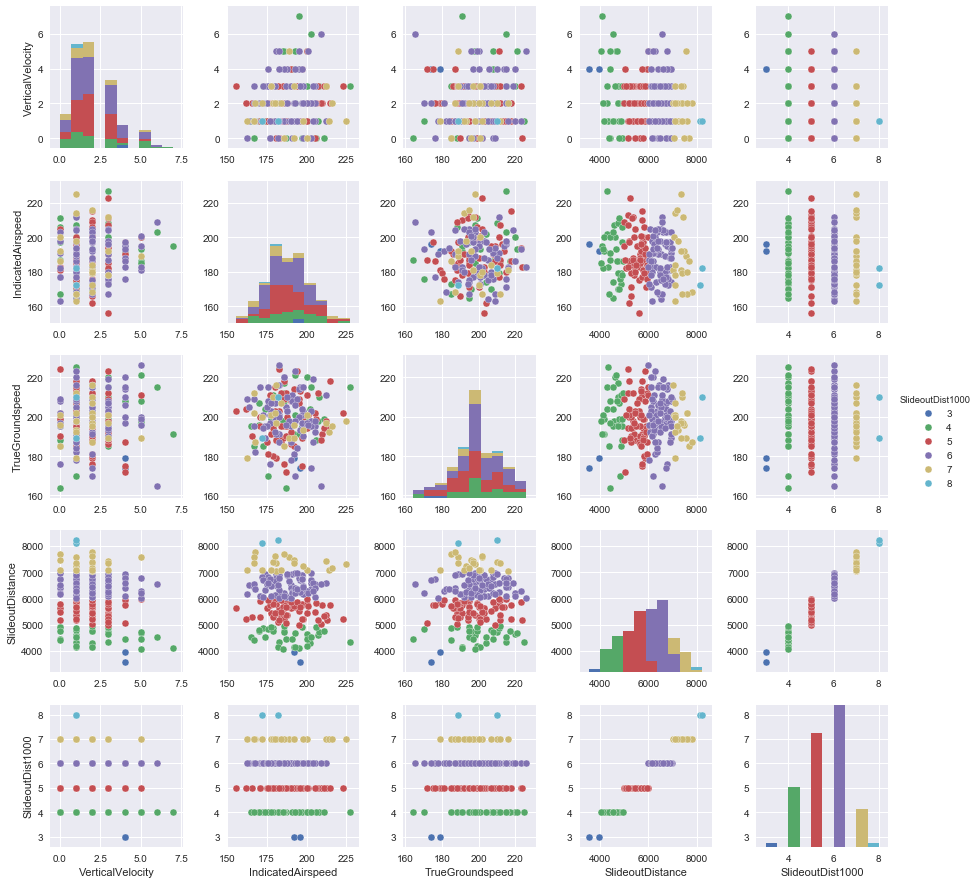

In [26]:

# ref #1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(filnam_realdata)
# use  SlideoutDist1000 to 'layer' the data into  layers of multiples of 1000 feet distances
sns.pairplot(df, hue='SlideoutDist1000')
plt.show()


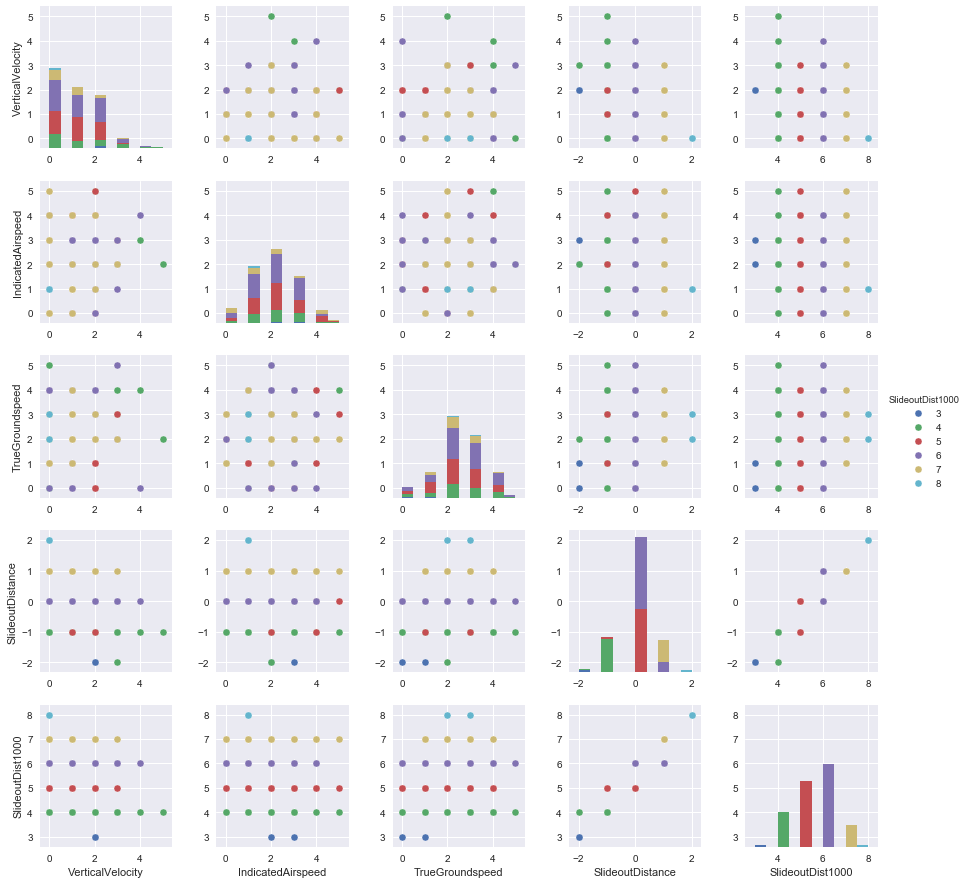

In [27]:
# ref #1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(filnam_normdata)
# use  SlideoutDist1000 to 'layer' the data into  layers of multiples of 1000 feet distances
sns.pairplot(df, hue='SlideoutDist1000')
plt.show()


References: 
#1, https://www.tutorialspoint.com/python/python_poisson_distribution.htm visited: 20181212

#2, https://stackoverflow.com/questions/24452594/fitting-a-poisson-distribution-to-data-in-statsmodels visited: 20181212

#3, https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.poisson.html visited: 20181212

#4, https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal visited: 20181212

#5, https://stackoverflow.com/questions/31247198/python-pandas-write-content-of-dataframe-into-text-file  visited: 2081213

#6, https://www.pythonforbeginners.com/files/reading-and-writing-files-in-python  visisted: 2081213

#7, https://stackoverflow.com/questions/16579407/are-there-any-example-data-sets-for-python  visisted: 20181213

#8, https://seaborn.pydata.org/introduction.html  visited: 20181213

